In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
import sweetviz as sv
from pycaret.classification import plot_model
import warnings
warnings.filterwarnings('ignore')


In [67]:
df = pd.read_csv('C:\\Users\\Hazel\\Desktop\\Data Analyst (2024)\\Power BI & ML\\hr_data.csv')

In [68]:
df.head()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2.0,157,3.0,0.0,1,0,sales,low,31
1,0.80,0.86,5.0,262,6.0,0.0,1,0,sales,medium,71
2,0.11,0.88,7.0,272,4.0,0.0,1,0,sales,medium,8
3,0.72,0.87,5.0,223,5.0,0.0,1,0,sales,low,68
4,0.37,0.52,2.0,159,3.0,0.0,1,0,sales,low,48


In [69]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         15004 non-null  float64
 1   Last Evaluation            15004 non-null  float64
 2   Number of Projects         14999 non-null  float64
 3   Monthly Hours              15004 non-null  int64  
 4   Total Time at the Company  14999 non-null  float64
 5   Work Accidents             15000 non-null  float64
 6   Quit the Company           15004 non-null  int64  
 7   Promoted in Last 5 yrs     15004 non-null  int64  
 8   Departments                15004 non-null  object 
 9   salary                     15004 non-null  object 
 10  Management                 15004 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.3+ MB


In [70]:
report = sv.analyze(df)

# Save the report as an HTML file
report.show_html('sweetviz_report.html')

                                             |                                                                …

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [71]:
setup(df,target='Quit the Company',ignore_features='Management',normalize=True,session_id=123)

,Description,Value
0,Session id,123
1,Target,Quit the Company
2,Target type,Binary
3,Original data shape,"(15004, 11)"
4,Transformed data shape,"(15004, 21)"
5,Transformed train set shape,"(10502, 21)"
6,Transformed test set shape,"(4502, 21)"
7,Ignore features,10
8,Numeric features,7
9,Categorical features,2


In [72]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9881,0.9911,0.9585,0.9913,0.9746,0.9668,0.9671,0.6330
lightgbm,Light Gradient Boosting Machine,0.9849,0.9934,0.9489,0.9872,0.9676,0.9577,0.9581,0.6430
et,Extra Trees Classifier,0.9840,0.9908,0.9505,0.9820,0.9658,0.9554,0.9557,0.5800
gbc,Gradient Boosting Classifier,0.9765,0.9891,0.9313,0.9689,0.9496,0.9343,0.9347,0.7990
dt,Decision Tree Classifier,0.9749,0.9699,0.9605,0.9361,0.9480,0.9314,0.9317,0.1210
ada,Ada Boost Classifier,0.9584,0.9830,0.9085,0.9167,0.9123,0.8851,0.8853,0.3870
knn,K Neighbors Classifier,0.9408,0.9663,0.8877,0.8673,0.8773,0.8382,0.8385,0.4470
qda,Quadratic Discriminant Analysis,0.8691,0.9167,0.8062,0.6977,0.7467,0.6593,0.6635,0.1450
svm,SVM - Linear Kernel,0.8003,0.7834,0.4666,0.5974,0.5179,0.3969,0.4042,0.1440
lr,Logistic Regression,0.7938,0.8178,0.3652,0.6131,0.4570,0.3400,0.3577,1.9520


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [73]:
model=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9848,0.9860,0.9442,0.9916,0.9673,0.9574,0.9579
1,0.9819,0.9941,0.9442,0.9793,0.9615,0.9497,0.9499
2,0.9924,0.9959,0.9760,0.9919,0.9839,0.9789,0.9789
3,0.9876,0.9876,0.9600,0.9877,0.9736,0.9655,0.9657
4,0.9848,0.9925,0.9400,0.9958,0.9671,0.9572,0.9578
5,0.9924,0.9933,0.9680,1.0000,0.9837,0.9788,0.9790
6,0.9876,0.9897,0.9640,0.9837,0.9737,0.9656,0.9657
7,0.9924,0.9908,0.9720,0.9959,0.9838,0.9788,0.9789
8,0.9895,0.9891,0.9640,0.9918,0.9777,0.9708,0.9710


In [74]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [75]:
tuned_model=tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9715,0.9753,0.9004,0.9784,0.9378,0.9193,0.9206
1,0.9715,0.9834,0.9283,0.9510,0.9395,0.9208,0.9210
2,0.9810,0.9878,0.9440,0.9752,0.9593,0.9469,0.9471
3,0.9733,0.9796,0.9160,0.9703,0.9424,0.9251,0.9257
4,0.9743,0.9781,0.9040,0.9869,0.9436,0.9270,0.9285
5,0.9800,0.9815,0.9360,0.9791,0.9571,0.9440,0.9444
6,0.9733,0.9752,0.9200,0.9664,0.9426,0.9253,0.9257
7,0.9724,0.9732,0.9040,0.9784,0.9397,0.9218,0.9230
8,0.9714,0.9737,0.9320,0.9472,0.9395,0.9208,0.9209


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [76]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9904,0.9931,0.9674,0.9924,0.9797,0.9735,0.9736


,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Promoted in Last 5 yrs,Departments,salary,Quit the Company,prediction_label,prediction_score
1679,0.43,0.55,2.0,159,3.0,0.0,0,RandD,low,1,1,0.97
4665,0.63,0.93,3.0,236,4.0,0.0,0,sales,high,0,0,1.00
1076,0.09,0.79,6.0,276,4.0,0.0,0,sales,medium,1,1,1.00
1253,0.85,1.00,4.0,234,5.0,0.0,0,hr,low,1,1,0.99
2570,0.80,0.96,3.0,257,5.0,0.0,0,support,medium,0,0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
8931,0.92,0.56,3.0,174,3.0,0.0,0,sales,medium,0,0,1.00
9127,0.76,0.60,5.0,244,3.0,1.0,0,technical,low,0,0,1.00
10498,0.98,0.56,5.0,188,3.0,0.0,0,technical,low,0,0,1.00
14592,0.38,0.46,2.0,145,3.0,0.0,0,hr,medium,1,1,1.00


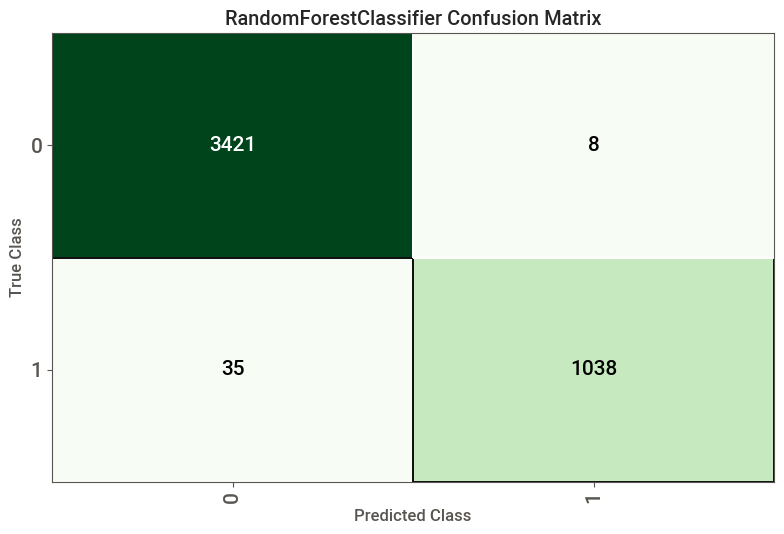

In [77]:
plot_model(tuned_model, plot='confusion_matrix')

In [78]:
save_model(tuned_model,'trial_class')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Satisfaction Level',
                                              'Last Evaluation',
                                              'Number of Projects',
                                              'Monthly Hours',
                                              'Total Time at the Company',
                                              'Work Accidents',
                                              'Promoted in Last 5 yrs'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               mis

In [79]:
coef= pd.DataFrame(zip(model.feature_names_in_, model.feature_importances_.flatten()), 
                      columns=['feature', 'coefficient']).sort_values(by='coefficient', ascending=False)
coef

,feature,coefficient
0,Satisfaction Level,0.315909
4,Total Time at the Company,0.186489
2,Number of Projects,0.174441
3,Monthly Hours,0.152284
1,Last Evaluation,0.123980
5,Work Accidents,0.008799
18,salary_low,0.006974
19,salary_high,0.004504
11,Departments _technical,0.003809
9,Departments _sales,0.003716
